In [316]:
# Importando as bibliotecas do projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [317]:
# Funções que serão utilizadas ao longo do código

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import tree

In [318]:
# Importando o arquivo csv

base = pd.read_csv('../restaurant.csv', sep=';')
base

,Exemplo,Alternativo,Bar,SexSab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,X1,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,x2,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,x3,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim
3,x4,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,10-30,Sim
4,X5,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60,Não
5,X6,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,X7,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10,Não
7,X8,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10,Sim
8,X9,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60,Não
9,X10,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,10-30,Não


In [319]:
# Removendo uma coluna desnecessária da Tabela

exemplo_column = base.columns[0]
base = base.drop(exemplo_column, axis=1)
base

,Alternativo,Bar,SexSab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,10-30,Sim
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60,Não
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10,Não
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10,Sim
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60,Não
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,10-30,Não


In [320]:
# Separando os atributos de entrada do atributo de classificação

entries_prev = base.iloc[:, 0:10].values
classification_class = base.iloc[:, 10].values

print("Entries attributes:", end='\n\n')
print(entries_prev, end='\n\n')
print("Classification attributes:", end='\n\n')
print(classification_class)

Entries attributes:

[['Sim' 'Não' 'Não' 'Sim' 'Alguns' 'RRR' 'Não' 'Sim' 'Francês' '0-10']
 ['Sim' 'Não' 'Não' 'Sim' 'Cheio' 'R' 'Não' 'Não' 'Tailandês' '30-60']
 ['Não' 'Sim' 'Não' 'Não' 'Alguns' 'R' 'Não' 'Não' 'Hamburger' '0-10']
 ['Sim' 'Não' 'Sim' 'Sim' 'Cheio' 'R' 'Sim' 'Não' 'Tailandês' '10-30']
 ['Sim' 'Não' 'Sim' 'Não' 'Cheio' 'RRR' 'Não' 'Sim' 'Francês' '>60']
 ['Não' 'Sim' 'Não' 'Sim' 'Alguns' 'RR' 'Sim' 'Sim' 'Italiano' '0-10']
 ['Não' 'Sim' 'Não' 'Não' 'Nenhum' 'R' 'Sim' 'Não' 'Hamburger' '0-10']
 ['Não' 'Não' 'Não' 'Sim' 'Alguns' 'RR' 'Sim' 'Sim' 'Tailandês' '0-10']
 ['Não' 'Sim' 'Sim' 'Não' 'Cheio' 'R' 'Sim' 'Não' 'Hamburger' '>60']
 ['Sim' 'Sim' 'Sim' 'Sim' 'Cheio' 'RRR' 'Não' 'Sim' 'Italiano' '10-30']
 ['Não' 'Não' 'Não' 'Não' 'Nenhum' 'R' 'Não' 'Não' 'Tailandês' '0-10']
 ['Sim' 'Sim' 'Sim' 'Sim' 'Cheio' 'R' 'Não' 'Não' 'Hamburger' '30-60']]

Classification attributes:

['Sim' 'Não' 'Sim' 'Sim' 'Não' 'Sim' 'Não' 'Sim' 'Não' 'Não' 'Não' 'Sim']


In [321]:
# Transformando os atributos de entrada qualitativos ordinais em numéricos

entries_prev[:,0] = LabelEncoder().fit_transform(entries_prev[:,0])
entries_prev[:,1] = LabelEncoder().fit_transform(entries_prev[:,1])
entries_prev[:,2] = LabelEncoder().fit_transform(entries_prev[:,2])
entries_prev[:,3] = LabelEncoder().fit_transform(entries_prev[:,3])
entries_prev[:,4] = LabelEncoder().fit_transform(entries_prev[:,4])
entries_prev[:,5] = LabelEncoder().fit_transform(entries_prev[:,5])
entries_prev[:,6] = LabelEncoder().fit_transform(entries_prev[:,6])
entries_prev[:,7] = LabelEncoder().fit_transform(entries_prev[:,7])
entries_prev[:,9] = LabelEncoder().fit_transform(entries_prev[:,9])

print(entries_prev)

[[1 0 0 1 0 2 0 1 'Francês' 0]
 [1 0 0 1 1 0 0 0 'Tailandês' 2]
 [0 1 0 0 0 0 0 0 'Hamburger' 0]
 [1 0 1 1 1 0 1 0 'Tailandês' 1]
 [1 0 1 0 1 2 0 1 'Francês' 3]
 [0 1 0 1 0 1 1 1 'Italiano' 0]
 [0 1 0 0 2 0 1 0 'Hamburger' 0]
 [0 0 0 1 0 1 1 1 'Tailandês' 0]
 [0 1 1 0 1 0 1 0 'Hamburger' 3]
 [1 1 1 1 1 2 0 1 'Italiano' 1]
 [0 0 0 0 2 0 0 0 'Tailandês' 0]
 [1 1 1 1 1 0 0 0 'Hamburger' 2]]


In [322]:
# Contando quantas opções de resposta tem cada atributo qualitativo nominal

len(np.unique(base['Cliente']))

3

In [323]:
# Utilizando o OneHotEncoder para transformar os atributos qualitativos nominais em numéricos

onehotencoder_restaurante = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [8])], remainder='passthrough')
entries_prev= onehotencoder_restaurante.fit_transform(entries_prev)

print(entries_prev, end='\n\n')
print(entries_prev.shape)

[[1.0 0.0 0.0 0.0 1 0 0 1 0 2 0 1 0]
 [0.0 0.0 0.0 1.0 1 0 0 1 1 0 0 0 2]
 [0.0 1.0 0.0 0.0 0 1 0 0 0 0 0 0 0]
 [0.0 0.0 0.0 1.0 1 0 1 1 1 0 1 0 1]
 [1.0 0.0 0.0 0.0 1 0 1 0 1 2 0 1 3]
 [0.0 0.0 1.0 0.0 0 1 0 1 0 1 1 1 0]
 [0.0 1.0 0.0 0.0 0 1 0 0 2 0 1 0 0]
 [0.0 0.0 0.0 1.0 0 0 0 1 0 1 1 1 0]
 [0.0 1.0 0.0 0.0 0 1 1 0 1 0 1 0 3]
 [0.0 0.0 1.0 0.0 1 1 1 1 1 2 0 1 1]
 [0.0 0.0 0.0 1.0 0 0 0 0 2 0 0 0 0]
 [0.0 1.0 0.0 0.0 1 1 1 1 1 0 0 0 2]]

(12, 13)


In [324]:
# Dividindo os dados em treino e teste

entries_treino, entries_teste, classification_treino, classification_teste = train_test_split(entries_prev, classification_class, test_size = 0.20, random_state = 23)

print(entries_treino.shape, end='\n\n')
print(entries_teste.shape, end='\n\n')

(9, 13)

(3, 13)



In [325]:
# Criando o modelo de árvore de decisão

modelo = DecisionTreeClassifier(criterion='entropy')
Classification = modelo.fit(entries_treino, classification_treino)

In [326]:
# Testando o modelo

previsoes = modelo.predict(entries_teste)

In [327]:
print("Acuracia do modelo:", accuracy_score(classification_teste, previsoes))

Acuracia do modelo: 0.3333333333333333


0.3333333333333333

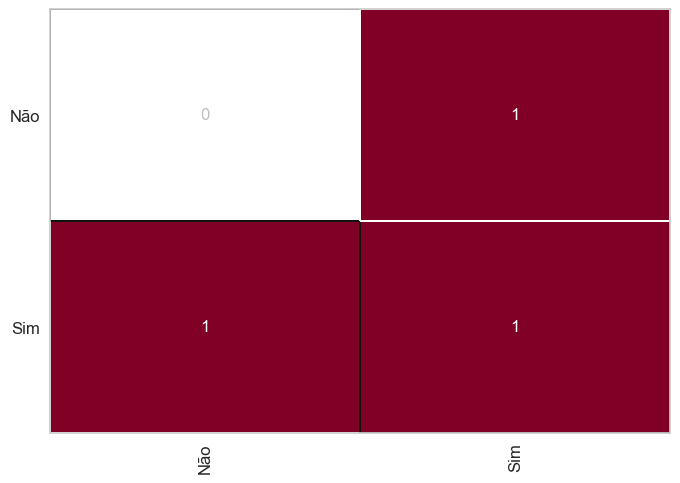

In [328]:
# Construindo a matriz de confusão do modelo

cm = ConfusionMatrix(modelo)
cm.fit(entries_treino, classification_treino)
cm.score(entries_teste, classification_teste)

In [329]:
# Imprimindo algumas outras metricas do modelo

print(classification_report(classification_teste, previsoes))

              precision    recall  f1-score   support

         Não       0.00      0.00      0.00         1
         Sim       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



[Text(0.3333333333333333, 0.875, 'Fome <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = Não'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Não'),
 Text(0.5, 0.625, 'Italiano <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Sim'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Sim'),
 Text(0.6666666666666666, 0.375, 'Alternativo <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Não'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Sim'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Não')]

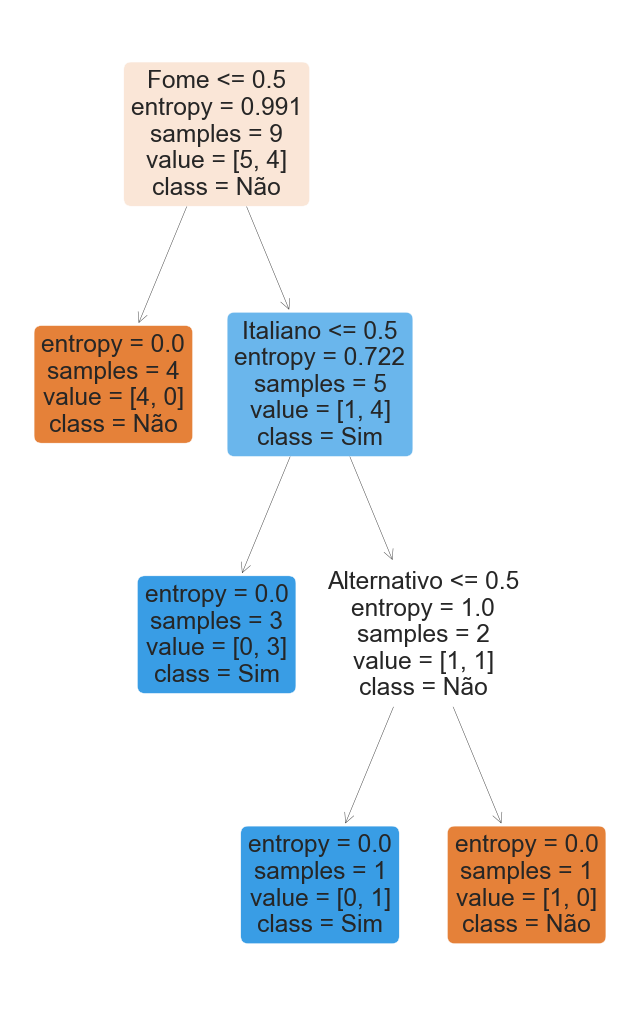

In [330]:
# Imprimindo a arvore gerada

previsores = ['Frances', 'Hamburguer', 'Italiano', 'Tailandes', 'Alternativo', 'Bar', 'SextaSabado', 'Fome', 'Cliente', 'Preco','Chuva','Res','Tipo', 'Tempo']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(8, 13))
tree.plot_tree(modelo, feature_names=previsores, class_names=modelo.classes_.tolist(), filled=True, rounded=True)

# plt.show(tree.plot_tree(Classification, filled=True, rounded=True))
# tree.plot_tree(modelo, feature_names=previsores, class_names=modelo.classes_.tolist(), filled=True, rounded=True, proportion=True)